# Support Vector Machine For Classification

We are going to train a SVM (Support Vector Machine) for the task of classification on the 'voice.xlsx' dataset.

## Import The Needed Libraries And Load The Dataset

Firstly, we mount google drive. Then we import the needed libraries and load the dataset using pandas from the 'voice.xlsx' file.

In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load the dataset using pandas

df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/svm/voice.xlsx')

## Summarization, Pre-processing, Visualization

We then display first few rows of the dataset. We also display the summary of the dataset. We see that no missing values exist in our dataset.

We then label encode the 'label' column and standardize the rest of the data. Then we split the dataset.

For visualization we make a pairplot (color coded by the 'label' column). From this we can see the most suitable parameters for classification from how each parameter deviates based on the label (hence we select parameters that have least overlapping or the most deviation).

In [ ]:
# Display the first few rows of the dataset

df.head()

meanfreq        sd    median       Q25  ...    maxdom   dfrange   modindx  label
0  0.059781  0.064241  0.032027  0.015071  ...  0.007812  0.000000  0.000000   male
1  0.066009  0.067310  0.040229  0.019414  ...  0.054688  0.046875  0.052632   male
2  0.077316  0.083829  0.036718  0.008701  ...  0.015625  0.007812  0.046512   male
3  0.151228  0.072111  0.158011  0.096582  ...  0.562500  0.554688  0.247119   male
4  0.135120  0.079146  0.124656  0.078720  ...  5.484375  5.476562  0.208274   male

[5 rows x 21 columns]

In [ ]:
# Display counts of null values. We can see there are none.

df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
# Display summary of the dataset

df.describe()

meanfreq           sd  ...      dfrange      modindx
count  3168.000000  3168.000000  ...  3168.000000  3168.000000
mean      0.180907     0.057126  ...     4.994630     0.173752
std       0.029918     0.016652  ...     3.520039     0.119454
min       0.039363     0.018363  ...     0.000000     0.000000
25%       0.163662     0.041954  ...     2.044922     0.099766
50%       0.184838     0.059155  ...     4.945312     0.139357
75%       0.199146     0.067020  ...     6.992188     0.209183
max       0.251124     0.115273  ...    21.843750     0.932374

[8 rows x 20 columns]

In [ ]:
# Label encode the dataset


from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
X, y = df.drop('label', axis = 1), le.fit_transform(df.label)

In [ ]:
# Standardize the dataset

X = (X - X.mean()) / X.std()

In [ ]:
# Split the dataset

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Make a pair plot

vis = pd.concat([pd.DataFrame(X_train, index=X_train.index), pd.Series([le.classes_[int(c)] for c in y_train], index=X_train.index)], axis=1)
vis.columns = df.columns

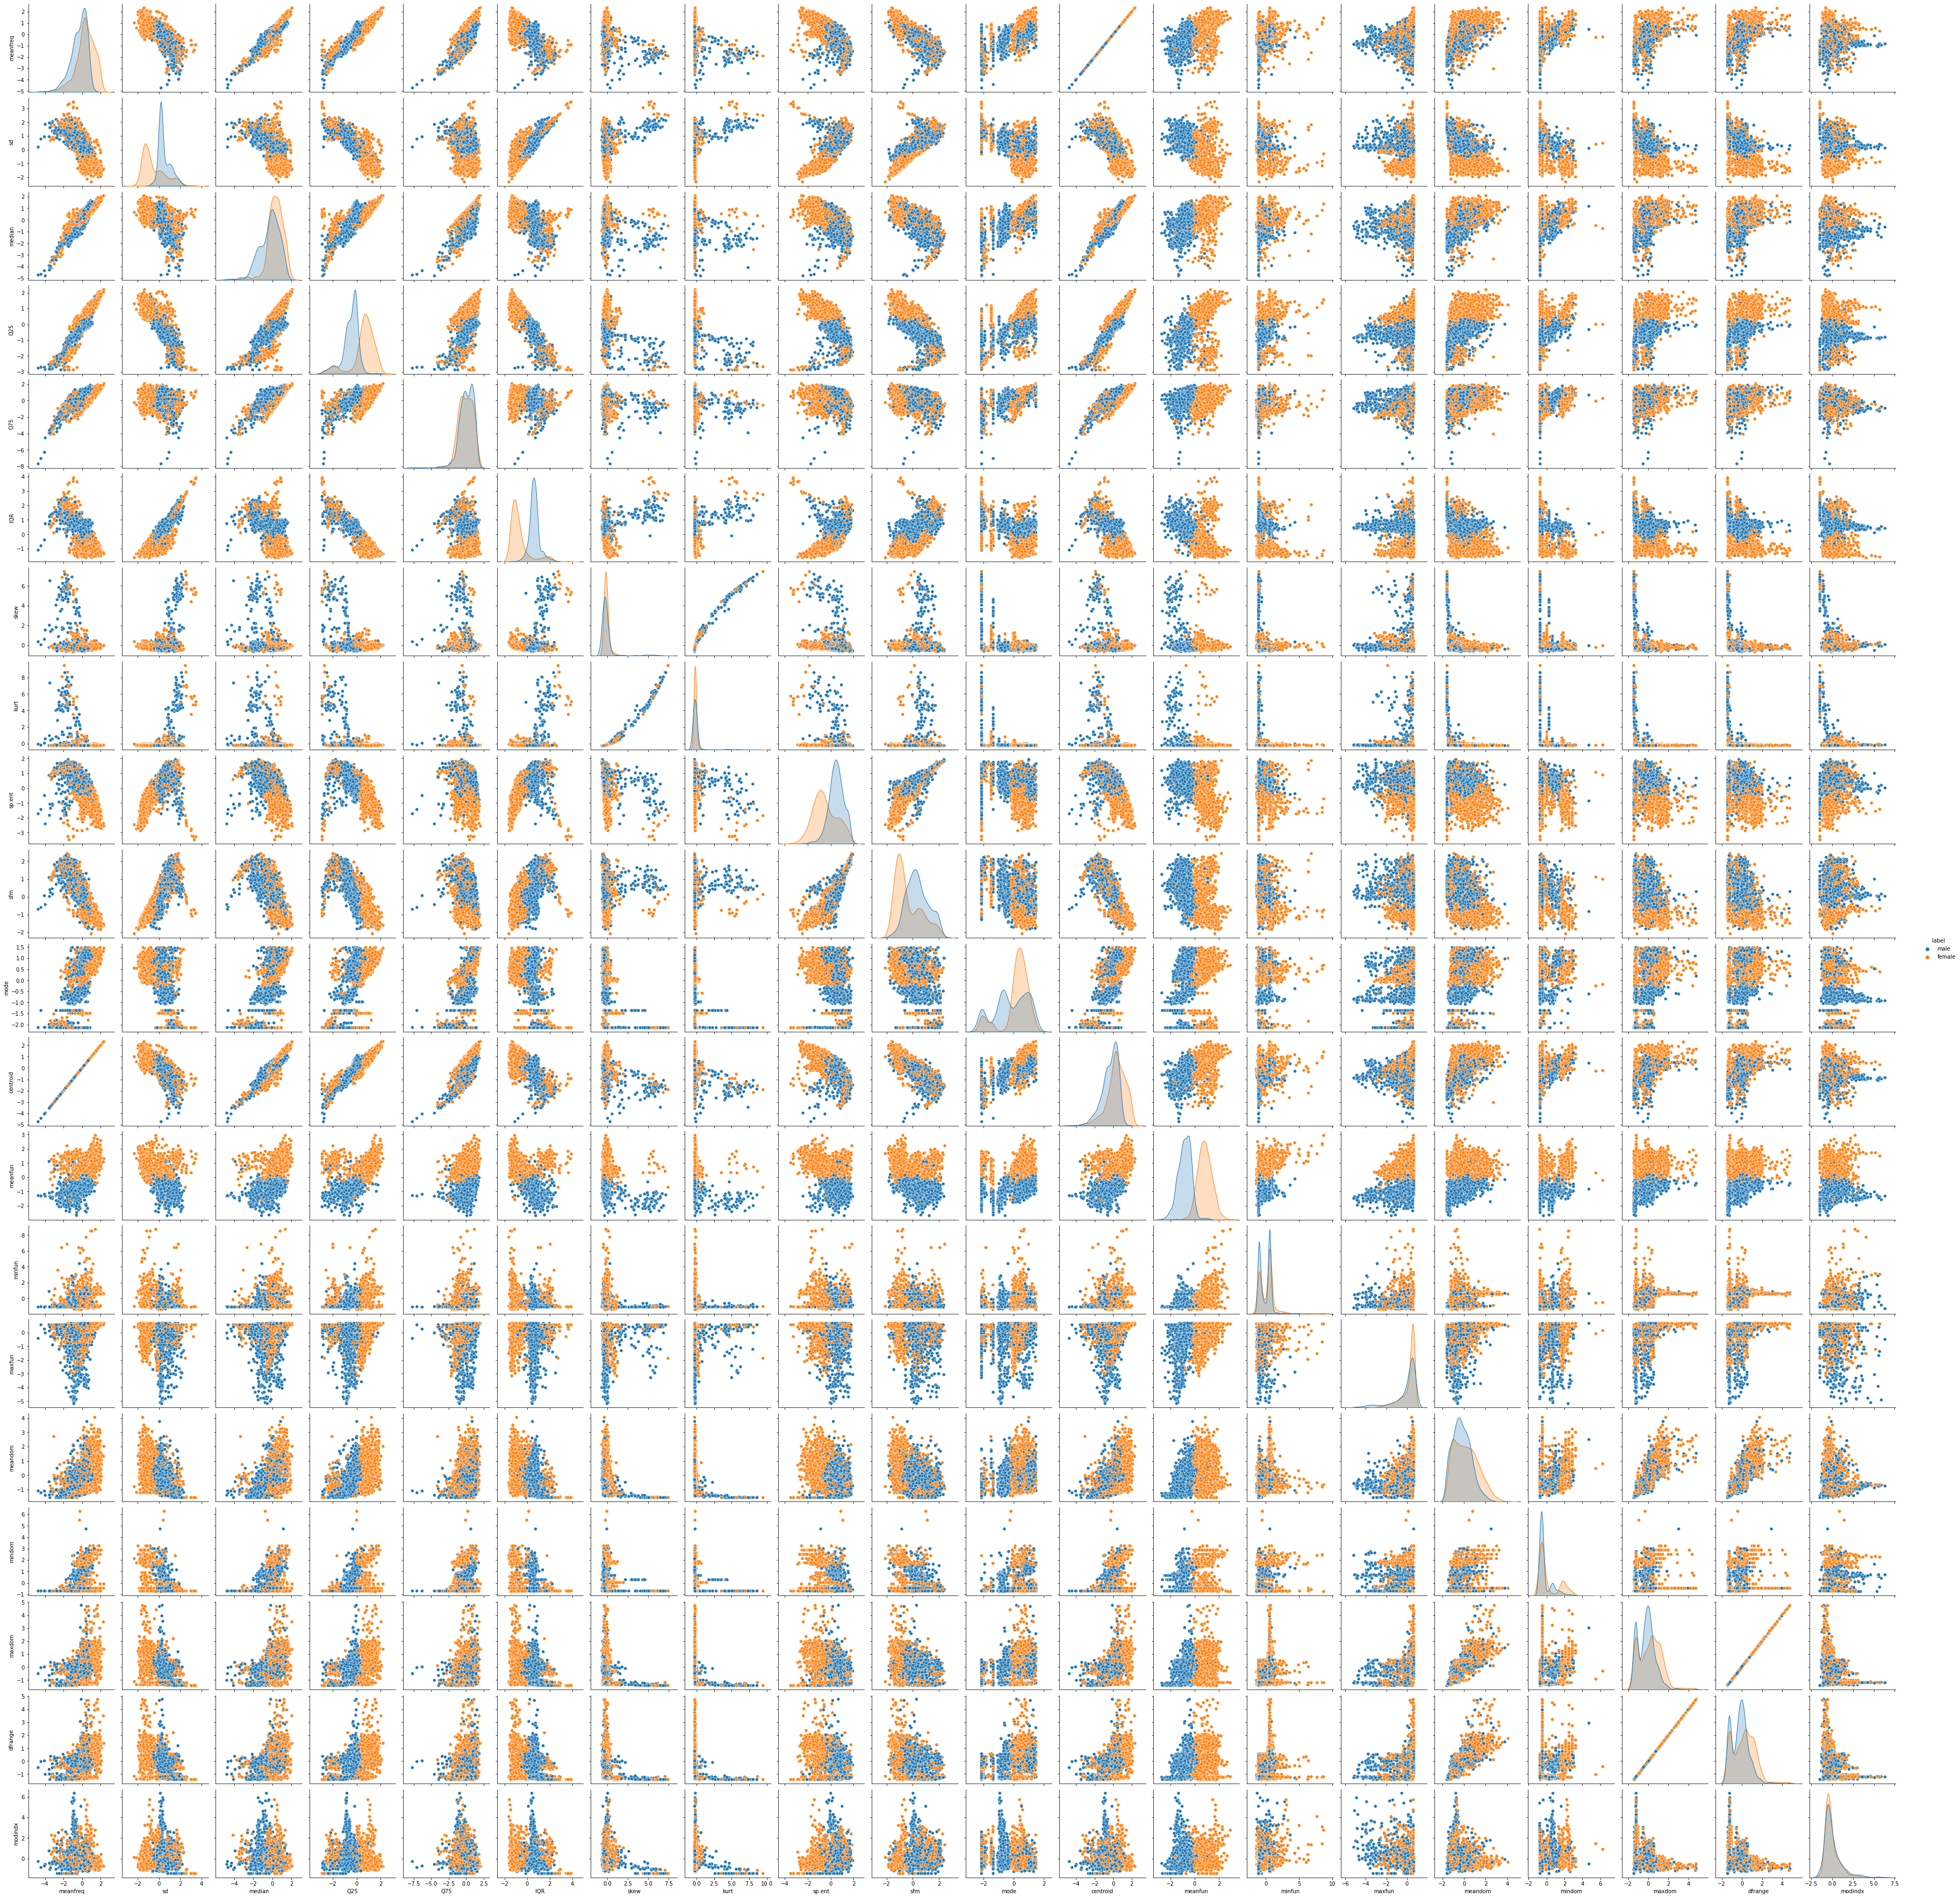

In [ ]:
# Image is better viewed separately

sns.pairplot(vis, hue='label')

In [ ]:
# Select the columns with the least overlap

selected_columns = ['sd', 'Q25', 'IQR', 'meanfun']
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

## Training, Evaluation Of Model

We use the 'C-support Vector Classification' algorithm/model implemented in the sci-kit learn library. We train the model on our training data and test it on our testing data.

For evaluation we print classification report, plot ROC-curve, plot confusion matrix and print various metrics like accuracy score, f1-score and ROC-AUC score.

In [ ]:
 # Create the model
 
 from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
# Train the model

model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Make predictions with the model

y_train_pred = model.predict(X_train)

In [ ]:
# Display some metrics related to the model

from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, plot_roc_curve, confusion_matrix

In [ ]:
print(f'Accuracy score: {accuracy_score(y_train, y_train_pred)}')
print(f'f1-score: {f1_score(y_train, y_train_pred)}')
print(f'ROC AUC score: {roc_auc_score(y_train, y_train_pred)}')

Accuracy score: 0.9734848484848485
f1-score: 0.973384030418251
ROC AUC score: 0.973490549192664


In [ ]:
# Print the classsification report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1194
           1       0.97      0.97      0.97      1182

    accuracy                           0.97      2376
   macro avg       0.97      0.97      0.97      2376
weighted avg       0.97      0.97      0.97      2376



In [ ]:
# Display the confusion matrix

labels = [0, 1]
cfm_train = pd.DataFrame(confusion_matrix(y_train, y_train_pred, labels = labels), columns = le.classes_, index = le.classes_)

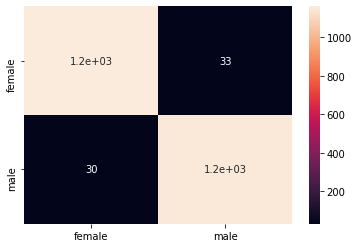

In [ ]:
sns.heatmap(cfm_train, annot = True)

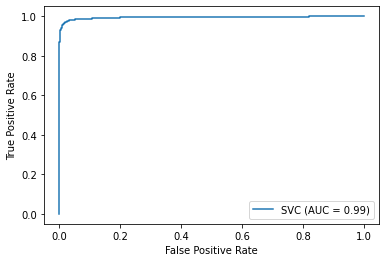

In [ ]:
# Display the ROC-curve

plot_roc_curve(model, X_train, y_train)
plt.show()

In [ ]:
# Evaluate the model on the testing dataset & display metrics similar to what was done on the training data

y_pred = model.predict(X_test)

In [ ]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'f1-score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC score: {roc_auc_score(y_test, y_pred)}')

Accuracy score: 0.9823232323232324
f1-score: 0.9825436408977556
ROC AUC score: 0.9823574435514735


In [ ]:
cfm_test = pd.DataFrame(confusion_matrix(y_test, y_pred, labels = labels), columns = le.classes_, index = le.classes_)

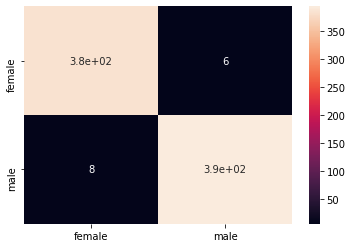

In [ ]:
sns.heatmap(cfm_test, annot = True)

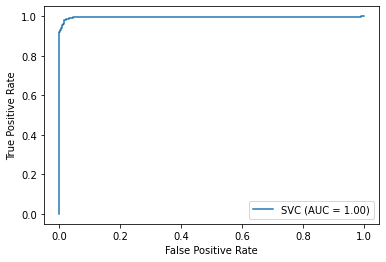

In [ ]:
plot_roc_curve(model, X_test, y_test)
plt.show()